In [1]:
import numpy as np
import pandas as pd
import sympy as sym

In [2]:
sym.init_printing()

# Dynamics of a double pendulum

The system can be described by the two centers of masses $m_1$, $m_2$ resp. $\vec{r}_1=\begin{pmatrix}x_1 \\ y_1\end{pmatrix}$, $\vec{r}_2=\begin{pmatrix}x_2 \\ y_2\end{pmatrix}$

As the two arms of the pendulum are of constant length $l_1$, $l_2$ it is convient to described the system by the two angles $\theta_1$ and $\theta_2$.

In this case we have

$x_1 = l_1\cos{\theta_1}$, $y_1 = l_1\sin{\theta_1}$ 

$x_2 = x_1 + l_2\cos{\theta_2} = l_1\cos{\theta_1} + l_2\cos{\theta_2}$, $y_2 = y_1 + l_2\sin{\theta_2} = l_1\sin{\theta_1}+ l_2\sin{\theta_2}$

In [82]:
x1, x2, y1, y2 = sym.symbols("x_1, x_2, y_1, y_2")

In [3]:
l1, l2, m1, m2, t1, t2 = sym.symbols("l_1, l_2, m_1, m_2, theta_1, theta_2")

In [83]:
w1, w2 = sym.symbols("omega_1, omega_2")

In [90]:
x1 = l1*sym.cos(t1)
y1 = l1*sym.sin(t1)
x2 = x1 + l2*sym.cos(t2)
y2 = y1 + l2*sym.sin(t2)

In [91]:
r1 = sym.V([[x1],[y1]])
r2 = sym.Matrix([[x2],[y2]])

In [116]:
dr1dt = r1.diff(t1)*w1

In [117]:
dr2dt = (r2.diff(t1)*w1+r2.diff(t2)*w2)

In [118]:
(dr1dt[0]**2+dr1dt[1]**2).simplify()

In [119]:
(dr2dt[0]**2+dr2dt[1]**2).simplify()

## Kinentic Energy

The kinetic energy of the system is accordingly composed of the to terms

$ T = T_1 + T_2$ 

with $ T_1 = \frac{1}{2}m_1\dot{\vec{r}}_1^2 = \frac{1}{2}m_1\begin{pmatrix}-l_1\dot{\theta_1}\cos{\theta_1} \\ l_1\dot{\theta_1}\cos{\theta_1}\end{pmatrix}^2 = \frac{1}{2}m_1l_1^2\dot{\theta_1}^2$

and $ T_2 = \frac{1}{2}m_2\dot{\vec{r}}_2^2 = \frac{1}{2}m_2\left(\dot{\vec{r}}_1+\begin{pmatrix}-l_2\dot{\theta_2}\cos{\theta_2} \\ l_2\dot{\theta_2}\cos{\theta_2}\end{pmatrix}\right)^2 = \frac{1}{2}m_2l_1^2\dot{\theta_1}^2+ \frac{1}{2}m_2l_2^2\dot{\theta_2}^2+ m_2l_2l_1\dot{\theta_1}\dot{\theta_2}\cos{\left(\theta_1-\theta_2\right)}$

$T = \frac{1}{2}(m_1+m_2)l_1^2\dot{\theta_1}^2+ \frac{1}{2}m_2l_2^2\dot{\theta_2}^2+ m_2l_2l_1\dot{\theta_1}\dot{\theta_2}\cos{\left(\theta_1-\theta_2\right)}$

In [29]:
T = 1/2*(m1 + m2)*l1**2*w1**2 + 1/2*m2*l2**2*w2**2 + m2*l1*l2*w1*w2*sym.cos(t1-t2)
T

In [128]:
T = ((m1*(dr1dt[0]**2+dr1dt[1]**2)/2+m2*(dr2dt[0]**2+dr2dt[1]**2)/2)).simplify()

## Potential energy

The potential energy of a mass $m$ in the field of gravity is $V = m\cdot g \cdot h$ where $g\approx \mathrm{9.81}\frac{\mathrm{m}}{\mathrm{s}^2}$ is the earth gravity

This yields the two contribution from the two pendulum's masses

$V = V_1+V_2$

with $V_1 = m_1gl_1\sin\theta_1$

and $V_2 = m_2g\left(l_1\sin\theta_1+l_2\sin\theta_2\right)$


$V = (m_1+m_2)gl_1\sin\theta_1+m_2gl_2\sin\theta_2$

In [129]:
g = sym.symbols("g")

In [130]:
V = (m1 + m2)*g*l1*sym.sin(t1) + m2*g*l2*sym.sin(t2)

## Lagrangian

The dynamics can therefor be described by the Langrangian $L = T-V$ where we use the general coordinates $q_1:=\theta_1$ and $q_2:=\theta_2$

$L = \frac{1}{2}(m_1+m_2)l_1^2\dot{q_1}^2+ \frac{1}{2}m_2l_2^2\dot{q_2}^2+m_2l_2l_1\dot{q_1}\dot{q_2}\cos{\left(q_1-q_2\right)} - (m_1+m_2)gl_1\sin q_1+m_2gl_2\sin q_2$

In [131]:
L = T-V

In [132]:
q1, q2 = sym.symbols("q_1 q_2")

In [133]:
L = L.subs({t1:q1,t2:q2})

### Generalized momenta

The generalized momenta for the general coordinates are given by the paritial derivatives 

$p_1 = \frac{\partial L}{\partial \dot{q}_1}$ and $p_2 = \frac{\partial L}{\partial \dot{q}_2}$

$p_1 = l_1^2(m_1+m_2)\dot{q}_1+l_1l_2m_2\cos{(q_1-q_2)}\dot{q}_2$

$p_2 = l_1l_2m_2\cos{(q_1-q_2)}\dot{q}_1+l_2^2m_2\dot{q}_2$

In [134]:
p1 = sym.Derivative(L,w1).doit().simplify()
p2 = sym.Derivative(L,w2).doit().simplify()

In [135]:
p2

In [136]:
p1

## Hamiltonian

For getting the Hamiltonian $H=H\left(q_i,p_i\right)$ of the system we have to invert the generalized momenta to be expressed in terms of $p_i=p_i\left(q_i,\dot{q}_i\right)$. 

In order to to the we notice the following:

$p = \begin{pmatrix} p_1 \\ p_2 \end{pmatrix} = B \cdot \begin{pmatrix}\dot{q}_1 \\ \dot{p}_2\end{pmatrix}$

$\begin{pmatrix}\dot{q}_1 \\ \dot{p}_2\end{pmatrix} = B^{-1}\cdot p$

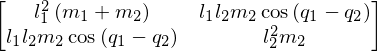

In [137]:
B = sym.Matrix([[l1**2*(m1+m2), l1*l2*m2*sym.cos(q1-q2)],
           [l1*l2*m2*sym.cos(q1-q2), l2**2*m2]])
B

We can invert this relation by inverting the matrix

In [138]:
p1, p2 = sym.symbols('p_1 p_2')

In [139]:
w = B.inv()*sym.Matrix([[p1],[p2]])

Now we can apply the Legendre-Transformation $H\left(q_i,p_i\right)=\sum_{i=1}^{n}\dot{q}_ip_i - L\left(q_i, \dot{q}_i\left(q_i,p_i\right)\right)$

In [140]:
H = p1*w[0]+p2*w[1]-L.subs({w1:w[0],w2:w[1]}).simplify()

# Equations of Motion

The equations of motion can be derived from the Hamiltonion by

$\dot{q}_i=\frac{\partial H}{\partial p_i}$

$\dot{p}_i=-\frac{\partial H}{\partial q_i}$

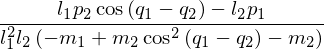

In [141]:
dq1dt = sym.Derivative(H,p1).doit().simplify()
dq1dt

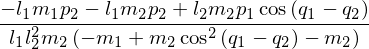

In [142]:
dq2dt = sym.Derivative(H,p2).doit().simplify()
dq2dt

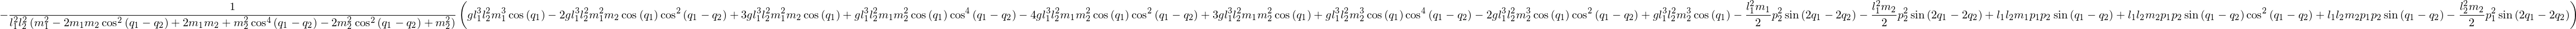

In [143]:
dp1dt = -sym.Derivative(H,q1).doit().simplify()
dp1dt

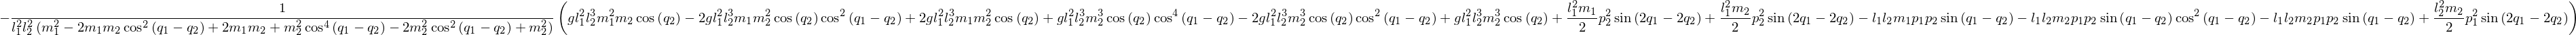

In [144]:
dp2dt = -sym.Derivative(H,q2).doit().simplify()
dp2dt

In [146]:
eom = sym.Matrix([dq1dt,dq2dt,dp1dt,dp2dt])

## Symmetric pendulum

In [147]:
l, m = sym.symbols('l m')

In [152]:
Hsym = H.subs({m1:m,m2:m,l1:l,l2:l}).simplify()

In [156]:
eom_sym = sym.Matrix([Hsym.diff(p1).simplify(),Hsym.diff(p2).simplify(),-Hsym.diff(q1).simplify(),-Hsym.diff(q2).simplify()])